In [2]:
import brainsss
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import random
from scipy.stats import sem
import time
import h5py
import ants
import nibabel as nib
import matplotlib
import pickle
from shutil import copyfile
from mpl_toolkits.axes_grid1 import ImageGrid

/home/users/brezovec/.local/lib/python3.6/site-packages/ants/viz/render_surface_function.py:16: UserWarning: Cant import Plotly. Install it `pip install chart_studio` if you want to use ants.render_surface_function
  "Cant import Plotly. Install it `pip install chart_studio` if you want to use ants.render_surface_function"


In [49]:
def load_FDA():
    FDA_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20220301_luke_2_jfrc_affine.nii'
    FDA = np.asarray(nib.load(FDA_file).get_fdata().squeeze(), dtype='float32')
    FDA = ants.from_numpy(FDA)
    FDA.set_spacing((.38,.38,.38))
    FDA_lowres = ants.resample_image(FDA,(.76,.76,.76),use_voxels=False)
    return FDA, FDA_lowres

FDA, FDA_lowres = load_FDA()

In [50]:
FDA = FDA[:,:,::-1]
FDA_lowres = FDA_lowres[:,:,::-1]

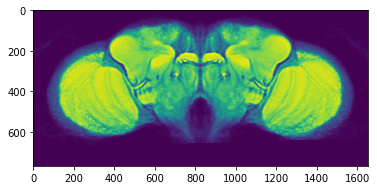

In [16]:
plt.imshow(FDA[:,:,100].T)

In [12]:
fly = 316
dir_ = f'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_{fly}'
file = os.path.join(dir_,'anat_0','moco','anatomy_channel_1_moc_mean.nii')
anat = ants.image_read(file)

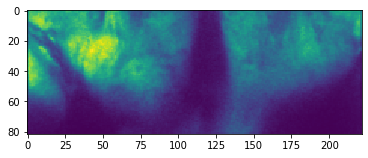

In [37]:
plt.imshow(anat[:,:,30].T)

In [18]:
anat.set_spacing((1.3,1.3,1))

In [35]:
anat_76 = ants.resample_image(anat,(.76,.76,.76),use_voxels=False)
ants.set_direction(anat_76,np.eye(3))

In [36]:
anat_76

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (380, 140, 93)
	 Spacing    : (0.76, 0.76, 0.76)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [41]:
sub_dim = {'x':anat_76.shape[0],
           'y':anat_76.shape[1],
           'z':anat_76.shape[2]}
sub_mids = {'x': int(anat_76.shape[0]/2),
            'y': int(anat_76.shape[1]/2),
            'z': int(anat_76.shape[2]/2)}

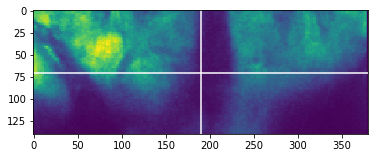

In [44]:
plt.imshow(anat_76[:,:,sub_mids['z']].T)
plt.axvline(sub_mids['x'],color='w')
plt.axhline(sub_mids['y'],color='w')

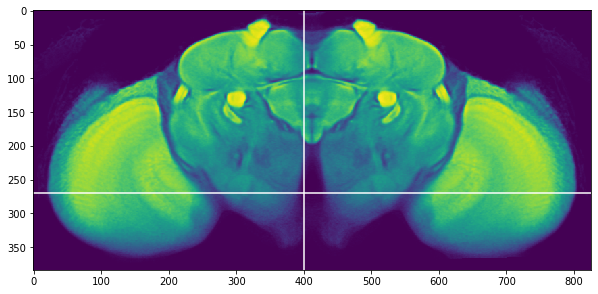

In [88]:
center = {'x':400,'y':270,'z':110}

plt.figure(figsize=(10,10))
plt.imshow(FDA_lowres[:,:,center['z']].T)
plt.axhline(center['y'],color='w')
plt.axvline(center['x'],color='w')

In [95]:
FDA_lowres_crop = FDA_lowres[center['x']-sub_mids['x']:center['x']+sub_mids['x'],
                             center['y']-sub_mids['y']:center['y']+sub_mids['y'],
                             center['z']-sub_mids['z']:center['z']+sub_mids['z']]

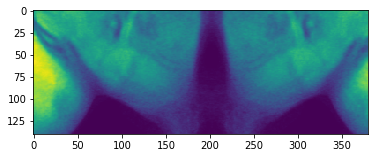

In [96]:
plt.imshow(FDA_lowres_crop[:,:,sub_mids['z']].T)

In [97]:
FDA_lowres_crop = ants.from_numpy(FDA_lowres_crop)
FDA_lowres_crop.set_spacing((0.76,0.76,0.76))

In [112]:
FDA_lowres.shape

(826, 384, 240)

In [101]:
out = ants.registration(fixed = FDA_lowres_crop,
                  moving = anat_76,
                  type_of_transform = 'SyN')

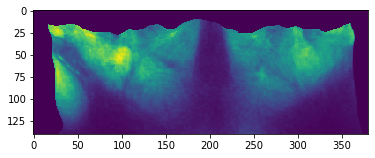

In [102]:
plt.imshow(out['warpedmovout'][:,:,sub_mids['z']].T)

In [109]:
empty = np.zeros(FDA_lowres.shape)
empty[center['x']-sub_mids['x']:center['x']+sub_mids['x'],
      center['y']-sub_mids['y']:center['y']+sub_mids['y'],
      center['z']-sub_mids['z']:center['z']+sub_mids['z']] = out['warpedmovout'].numpy()

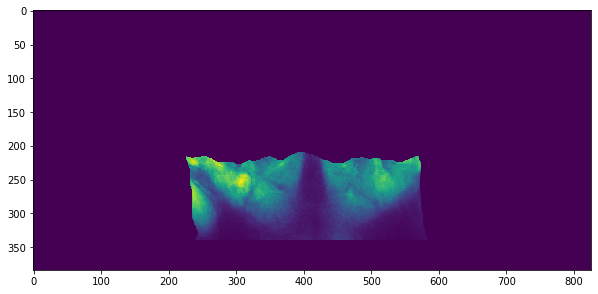

In [110]:
plt.figure(figsize=(10,10))
plt.imshow(empty[:,:,center['z']].T)

In [111]:
save_file = os.path.join(dir_,'warp','20230720_toFDA')
nib.Nifti1Image(empty, np.eye(4)).to_filename(save_file)

In [103]:
dir_

'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_316'

In [18]:
file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20230717_IPS_dataset_template/syn_1.nii"
meansub_vol = ants.image_read(file)
meansub_vol = meansub_vol[:,:,::-1]

In [19]:
meansub_vol.shape

(222, 82, 71)

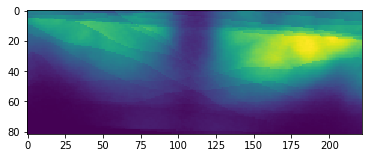

In [22]:
plt.imshow(meansub_vol[:,:,30].T)

In [3]:
1

1

In [4]:
### Load Luke Mean ###

luke_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20210310_luke_exp_thresh.nii"
res_luke_mean = (0.65,0.65,1)
luke_mean = np.asarray(nib.load(luke_path).get_data().squeeze(), dtype='float32')
luke_mean = luke_mean[:,:,::-1] #flipz
luke_mean = ants.from_numpy(luke_mean)
luke_mean.set_spacing(res_luke_mean)
luke_mean_lowres =  ants.resample_image(luke_mean,(256,128,49),use_voxels=True)

In [5]:
### Load JFRC2018 ###

fixed_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/JRC2018_FEMALE_38um_iso_16bit.nii"
res_JRC2018 = (0.38, 0.38, 0.38)
fixed = np.asarray(nib.load(fixed_path).get_data().squeeze(), dtype='float32')
fixed = ants.from_numpy(fixed)
fixed.set_spacing(res_JRC2018)
fixed_lowres = ants.resample_image(fixed,(2,2,2),use_voxels=False)

In [6]:
1

1

In [8]:
import bigbadbrain as bbb


In [9]:
################################
### Load voxel-res corr data ###
################################

dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210420_correlation/"
behaviors = ['Y_pos', 'Z_pos', 'Z_neg']
maps = {}
for behavior in behaviors:
    print(1)
    rvalues_to_load = [os.path.join(dataset_path, x) for x in os.listdir(dataset_path) if 'rvalues_{}'.format(behavior) in x]
    bbb.sort_nicely(rvalues_to_load)

    pvalues_to_load = [os.path.join(dataset_path, x) for x in os.listdir(dataset_path) if 'pvalues_{}'.format(behavior) in x]
    bbb.sort_nicely(pvalues_to_load)
    
    r_map = []
    p_map = []
    for z in range(49):
        r_map.append(np.load(rvalues_to_load[z]))
        p_map.append(np.load(pvalues_to_load[z]))

    r_map = np.asarray(r_map)
    p_map = np.asarray(p_map)
    
    r_map = np.reshape(r_map, (49,256,128))
    p_map = np.reshape(p_map, (49,256,128))
    
    #r_map[p_map >= 1e-4]=0
    
    maps[behavior] = r_map
    
############################################
### Put into plotting format with colors ###
############################################

slices = []
for z in range(49):
    colors1 = maps['Z_neg'][z,:,:].T
    colors2 = maps['Z_pos'][z,:,:].T
    colors3 = maps['Y_pos'][z,:,:].T
    to_plot = np.stack((colors1,colors2,colors3),axis=2)
    slices.append(to_plot)
slices = np.asarray(slices)

func = np.swapaxes(slices, 0, 2)
func.shape

moving = ants.from_numpy(func[:,:,::-1,:])
moving.set_spacing((2.6076, 2.6154, 5.3125, 1)) ### matching this to the slightly off luke mean
out = ants.registration(fixed_lowres, luke_mean_lowres, type_of_transform='Affine')
maps_voxel_res = ants.apply_transforms(fixed_lowres, moving, out['fwdtransforms'][0], imagetype=3, interpolator='nearestNeighbor')
maps_voxel_res.shape

1
1
1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


(314, 146, 91, 3)

In [15]:
in_ = ants.from_numpy(maps_voxel_res.numpy()[:,:,:,0])
in_

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (314, 146, 91)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [18]:
out = ants.resample_image(in_,(826, 384, 240),use_voxels=True)

In [19]:
out.shape

(826, 384, 240)

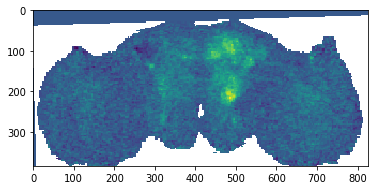

In [20]:
plt.imshow(out[:,:,100].T)

In [21]:
cluster_dir = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20221109_cluster_pca/"
save_file = os.path.join(cluster_dir,'20230720_R_turn')
nib.Nifti1Image(out.numpy(), np.eye(4)).to_filename(save_file)